# Fraud Detection System


This project focuses on detecting fraud in mobile money transactions, particularly cases where fraudsters deceive victims through phone calls by offering extra money and manipulating them into making transactions. The dataset contains records of various transactions, distinguishing between genuine and fraudulent ones. Our company aims to develop a machine learning model that can identify fraud in real-time, helping prevent financial losses and ensuring user safety. To achieve this, we will analyze transaction patterns, uncover key fraud indicators, and build a robust model capable of detecting fraudulent activities before they occur.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Fraud_Analysis_Dataset.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0


# Overview

step: Represents time in hours since the simulation started.
    
type: The type of transaction (CASH-IN, CASH-OUT, DEBIT, PAYMENT, TRANSFER).

amount: The transaction amount in local currency. means how much money detect from account

nameOrig: The customer who initiated the transaction.users ID LIKE account number

oldbalanceOrg: The sender's account balance before the transaction. 

newbalanceOrig: The sender's account balance after the transaction.

nameDest: The recipient of the transaction.resiver ID LIKE account number

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants). Receiver oldbalance 

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants). Receiver newbalance

isFraud: Indicates whether the transaction was fraudulent (1) or not (0).

Each row in the data represents a user's transaction, including details like transaction type, amount, and account balance before and after the transaction. The final transaction recorded for a user is the one that resulted in fraud.

By building a model, we can identify fraudulent transactions before they occur, helping to prevent fraud and reduce financial losses for the company. The model can predict suspicious transactions in real-time and take preventive actions, such as sending alerts or warning messages to users, discouraging them from proceeding with the transaction and protecting them from fraud.

Outliers are important in fraud detection because fraudulent transactions often have unusual patterns that differ from normal transactions. Removing outliers may eliminate key fraud indicators, making the model less effective in identifying fraudulent activities.

#First, we will check if there are any duplicate rows in the data.








In [3]:
data.duplicated().sum()

0

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


The sender's ID (nameOrig) and the receiver's ID (nameDest) cannot be used to determine whether a transaction will be fraudulent before it happens. Therefore, these columns are not useful for our model.

In [5]:
df = data.drop(columns=['nameOrig', 'nameDest'])

In [6]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1
1,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1
2,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1
3,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1
4,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1


now' i will check is there null values or not ?

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

there are no null values , now i will check the datatypes are correct or not .

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   oldbalanceOrg   11142 non-null  float64
 4   newbalanceOrig  11142 non-null  float64
 5   oldbalanceDest  11142 non-null  float64
 6   newbalanceDest  11142 non-null  float64
 7   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 696.5+ KB


all dtypes are correct , now i will check there is empty values or not 

In [9]:
(df == " ").sum()  

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

now,i will rename the features to make them easier to understand.

In [10]:
df = df.rename(columns={
    "step": "TransactionHour",
    "type": "TransactionType",
    "amount": "TransactionAmount",
    "oldbalanceOrg": "SenderBalanceBefore",
    "newbalanceOrig": "SenderBalanceAfter",
    "oldbalanceDest": "ReceiverBalanceBefore",
    "newbalanceDest": "ReceiverBalanceAfter",
    "isFraud": "IsFraud"
})

In [11]:
df.head(1)

,TransactionHour,TransactionType,TransactionAmount,SenderBalanceBefore,SenderBalanceAfter,ReceiverBalanceBefore,ReceiverBalanceAfter,IsFraud
0,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1


Now, I will perform EDA to analyze the relationship and patterns between independent features and the target feature. This will help in understanding which features are useful and which ones might cause issues.

I will check the ratio of 1s and 0s in the IsFraud column to understand the class distribution..

In [12]:
df["IsFraud"].value_counts()

IsFraud
0    10000
1     1142
Name: count, dtype: int64

In [13]:
df.shape

(11142, 8)

In [14]:
fraud_counts = df["IsFraud"].value_counts()
fraud_percentages = (fraud_counts / fraud_counts.sum()) * 100
print(fraud_percentages)

IsFraud
0    89.750494
1    10.249506
Name: count, dtype: float64


A dataset is generally considered "imbalanced" when one class represents a significantly higher percentage than the other, with a common threshold being around an 80:20 or 90:10 ratio

# Our dataset also has a 90:10 ratio, which indicates that it is highly imbalanced.








To address this imbalance, I will use undersampling, ensuring no repeated rows. However, I won’t apply it immediately, as it would reduce the data significantly. First, I'll analyze the full dataset (EDA) and handle imbalance during feature engineering. If undersampling doesn’t work well, I'll explore other techniques, including backward elimination.








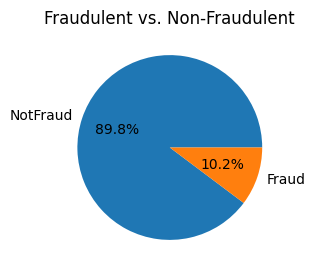

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
fraud_counts = df['IsFraud'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(fraud_counts, labels=['NotFraud', 'Fraud'], autopct='%1.1f%%')
plt.title('Fraudulent vs. Non-Fraudulent')
plt.show()

In [16]:
df["TransactionHour"].describe() , df["TransactionHour"].value_counts()

(count    11142.000000
 mean         8.717645
 std         16.067479
 min          1.000000
 25%          2.000000
 50%          6.000000
 75%          7.000000
 max         95.000000
 Name: TransactionHour, dtype: float64,
 TransactionHour
 7     2914
 1     2708
 6     1660
 2     1014
 5      665
       ... 
 54       4
 28       4
 49       4
 29       4
 23       2
 Name: count, Length: 95, dtype: int64)

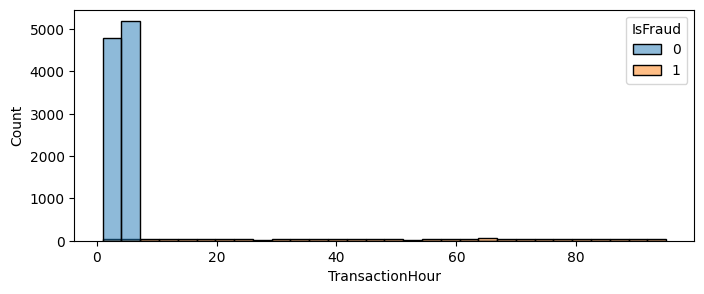

In [17]:
plt.figure(figsize=(8,3))
sns.histplot(x="TransactionHour" ,data = df , bins =30 ,hue = "IsFraud")
plt.show()

My analysis shows that non-fraudulent transactions mostly occur between 0 to 8 hours, but there are also a few fraudulent transactions in this range. However, non-fraudulent transactions are strictly within the 0 to 8-hour range and do not appear outside of it.

I am going to categorize TransactionHour into three ranges: 0 to 8 (Low), 8 to 50 (Medium), and 50 and above (High). This categorization will help analyze the relationship between transaction timing and fraud detection more effectively. Since non-fraudulent transactions mostly occur between 0 to 8, this approach may reveal patterns that differentiate fraudulent and non-fraudulent transactionsI will apply this categorization during feature engineering, not immediately, as we need to analyze the multivariate relationships first. This will help us manage features effectively based on their impact on the overall analysis.

In [18]:
df["TransactionType"].value_counts()

TransactionType
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64

In [19]:
fraud_percent = df.groupby("TransactionType")["IsFraud"].value_counts(normalize=True).unstack(fill_value=0) * 100
print(fraud_percent)

IsFraud                   0          1
TransactionType                       
CASH_IN          100.000000   0.000000
CASH_OUT          69.107429  30.892571
DEBIT            100.000000   0.000000
PAYMENT          100.000000   0.000000
TRANSFER          61.475410  38.524590


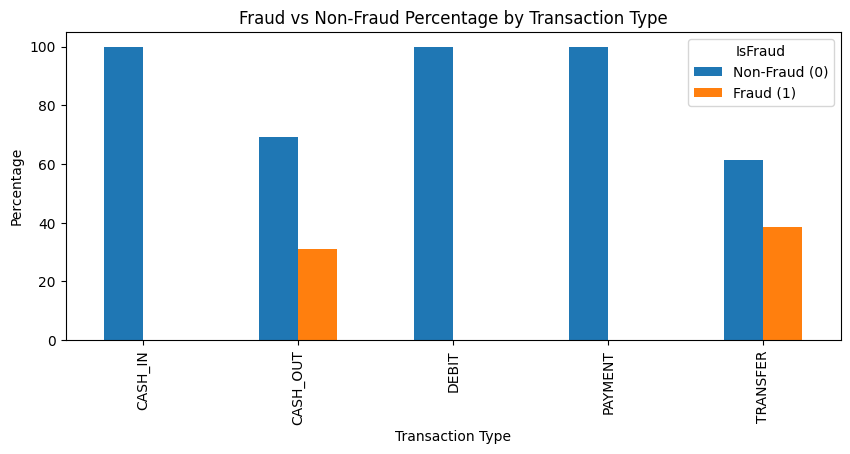

In [26]:
fraud_percent.plot(kind='bar', figsize=(10,4))
plt.xlabel("Transaction Type")
plt.ylabel("Percentage")
plt.title("Fraud vs Non-Fraud Percentage by Transaction Type")
plt.legend(title="IsFraud", labels=["Non-Fraud (0)", "Fraud (1)"])
plt.xticks(rotation=90)
plt.show()

I analyzed that there are five types of transactions: Payment, Debit, Cash_In, Cash_Out, and Transfer, which are commonly used in transactions. However, fraud only occurs in Cash_Out and Transfer transactions. This means that whenever a transaction is of type Cash_Out or Transfer, the probability of fraud is higher. Additionally, I observed that fraud does not occur in the other transaction types.

Fraud occurs only in Cash_Out and Transfer transactions, with a high probability of over 80%. Other transaction types (Cash_In, Debit, Payment) have 0% fraud, meaning fraud never happens in them. Hence, TransactionType is a strong indicator for fraud detection.

In [25]:
df.sample(5)

,TransactionHour,TransactionType,TransactionAmount,SenderBalanceBefore,SenderBalanceAfter,ReceiverBalanceBefore,ReceiverBalanceAfter,IsFraud
7723,6,CASH_IN,111460.82,2468614.51,2580075.33,202786.00,91325.18,0
9229,7,TRANSFER,261399.78,0.00,0.00,282354.82,916266.80,0
6901,6,CASH_IN,192005.11,7553719.76,7553719.76,7553719.76,11400000.00,0
2314,1,PAYMENT,2033.14,186592.00,184558.86,0.00,0.00,0
7719,6,CASH_IN,135998.76,1913438.35,2049437.11,351690.17,31444.70,0


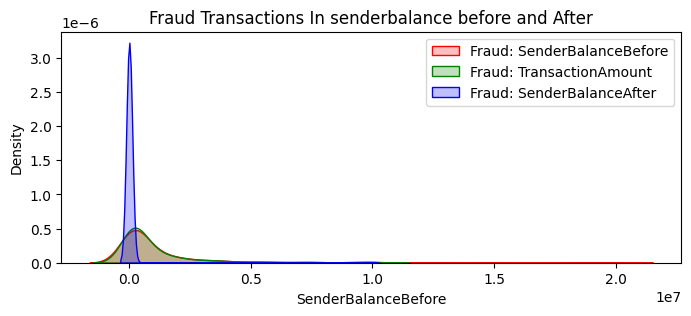

In [26]:
plt.figure(figsize=(8,3))
sns.kdeplot(df[df['IsFraud'] == 1]['SenderBalanceBefore'], color='red', label="Fraud: SenderBalanceBefore", fill=True)
sns.kdeplot(df[df['IsFraud'] == 1]['TransactionAmount'], color='green', label="Fraud: TransactionAmount", fill=True)
sns.kdeplot(df[df['IsFraud'] == 1]['SenderBalanceAfter'], color='blue', label="Fraud: SenderBalanceAfter", fill=True)
plt.ylabel("Density")
plt.title("Fraud Transactions In senderbalance before and After")
plt.legend()
plt.show()

I analyzed that in fraudulent transactions, the user's balance before the transaction (SenderBalanceBefore) is equal to the transaction amount. This indicates that fraudsters tend to empty the accounts, resulting in SenderBalanceAfter becoming zero.

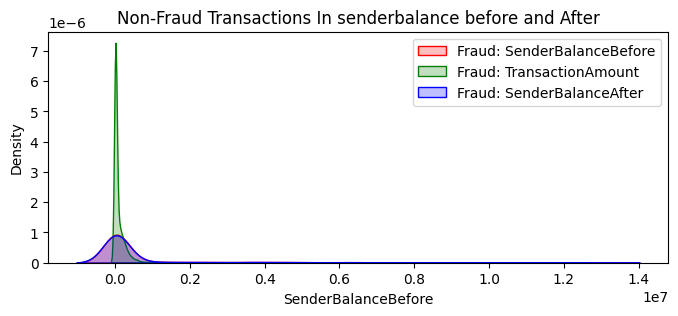

In [27]:
# Non-Fraud Transactions
plt.figure(figsize=(8,3))
sns.kdeplot(df[df['IsFraud'] == 0]['SenderBalanceBefore'], color='red', label="Fraud: SenderBalanceBefore", fill=True)
sns.kdeplot(df[df['IsFraud'] == 0]['TransactionAmount'], color='green', label="Fraud: TransactionAmount", fill=True)
sns.kdeplot(df[df['IsFraud'] == 0]['SenderBalanceAfter'], color='blue', label="Fraud: SenderBalanceAfter", fill=True)
plt.ylabel("Density")
plt.title("Non-Fraud Transactions In senderbalance before and After")
plt.legend()
plt.show()

In non-fraud transactions, the TransactionAmount is not always equal to SenderBalanceBefore, meaning that users do not transfer their entire account balance at once. In contrast, fraudulent cases show the opposite pattern, where fraudsters empty the account completely, resulting in SenderBalanceAfter becoming zero. In non-fraud cases, there is a noticeable difference between SenderBalanceBefore and SenderBalanceAfter, indicating that genuine users retain some balance in their account, whereas fraudsters do not.

In [28]:
df.sample(5)

,TransactionHour,TransactionType,TransactionAmount,SenderBalanceBefore,SenderBalanceAfter,ReceiverBalanceBefore,ReceiverBalanceAfter,IsFraud
8228,6,PAYMENT,3392.19,64738.71,61346.52,0.00,0.00,0
10631,7,TRANSFER,388950.76,43053.00,0.00,11999.56,532138.20,0
4729,2,CASH_IN,201398.60,683085.59,884484.19,616919.00,7616.73,0
1006,84,TRANSFER,2627070.50,2627070.50,0.00,0.00,0.00,1
4567,2,PAYMENT,4004.23,1203.00,0.00,0.00,0.00,0


Both ReceiverBalanceBefore and ReceiverBalanceAfter represent the fraudster's account details—showing how much balance they had before committing fraud and what happened to their balance after receiving the money.

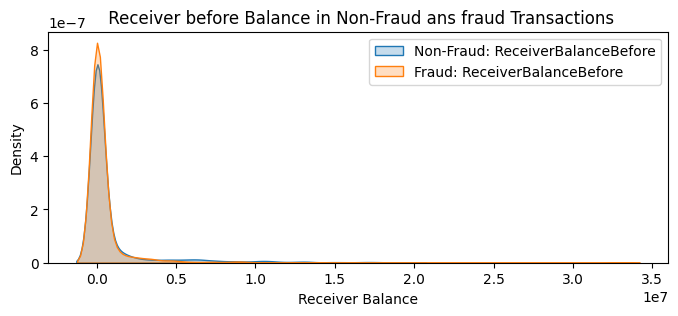

In [29]:
plt.figure(figsize=(8,3))
sns.kdeplot(df[df['IsFraud'] == 0]['ReceiverBalanceBefore'], label="Non-Fraud: ReceiverBalanceBefore", fill=True)
sns.kdeplot(df[df['IsFraud'] == 1]['ReceiverBalanceBefore'], label="Fraud: ReceiverBalanceBefore", fill=True)
plt.xlabel("Receiver Balance")
plt.ylabel("Density")
plt.title(" Receiver before Balance in Non-Fraud ans fraud Transactions")
plt.legend()
plt.show()

In [29]:
df[df["IsFraud"] == 1]["ReceiverBalanceBefore"].value_counts().head(10)

ReceiverBalanceBefore
0.00         728
267824.05      1
199385.83      1
98505.53       1
194134.25      1
223853.38      1
331969.08      1
4162.42        1
52021.34       1
288804.07      1
Name: count, dtype: int64

In this analysis shows that in non-fraudulent transactions, many recipients had a zero balance before receiving the money, while some already had funds in their accounts.

However, in fraudulent transactions, recipients' accounts were mostly and higher then non-fraudulent empty before receiving the money. This suggests that fraudsters usually operate with empty accounts, likely to avoid suspicion and minimize risk before scamming users and transferring money into them.

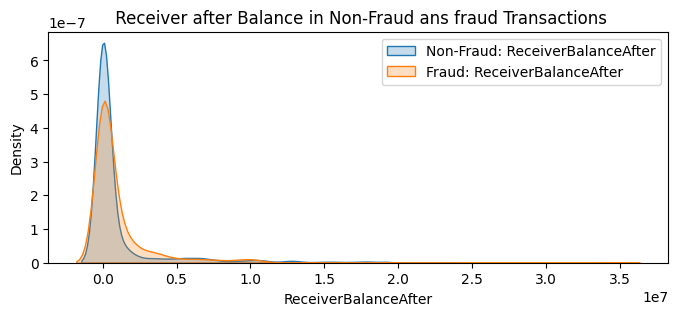

In [31]:
plt.figure(figsize=(8,3))
sns.kdeplot(df[df['IsFraud'] == 0]['ReceiverBalanceAfter'], label="Non-Fraud: ReceiverBalanceAfter", fill=True)
sns.kdeplot(df[df['IsFraud'] == 1]['ReceiverBalanceAfter'], label="Fraud: ReceiverBalanceAfter", fill=True)
plt.ylabel("Density")
plt.title(" Receiver after Balance in Non-Fraud ans fraud Transactions")
plt.legend()
plt.show()

In [31]:
df[df["IsFraud"] == 1]["ReceiverBalanceAfter"].value_counts().head(5), df[df["IsFraud"] == 0]["ReceiverBalanceAfter"].value_counts().head(5)

(ReceiverBalanceAfter
 0.00           555
 10000000.00      3
 10200000.00      2
 134195.64        1
 230960.48        1
 Name: count, dtype: int64,
 ReceiverBalanceAfter
 0.00           5838
 971418.91        32
 19200000.00      29
 10700000.00      25
 1254956.07       25
 Name: count, dtype: int64)

I observed that whether fraud happens or not, the receiver's account balance is mostly zero both before and after the transaction. However, in the case of fraudsters, their accounts usually have some balance after the transaction.

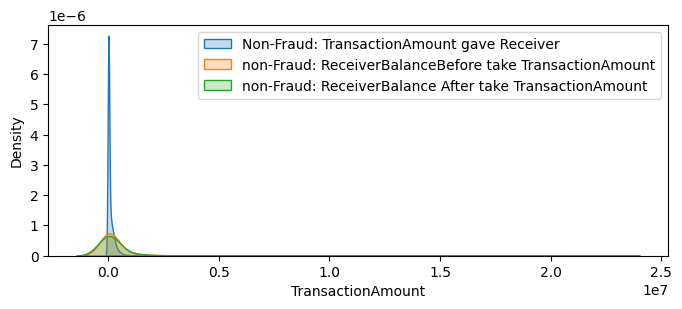

In [32]:
plt.figure(figsize=(8,3))
sns.kdeplot(df[df['IsFraud'] == 0]['TransactionAmount'], label="Non-Fraud: TransactionAmount gave Receiver", fill=True)
sns.kdeplot(df[df['IsFraud'] == 0]['ReceiverBalanceBefore'], label="non-Fraud: ReceiverBalanceBefore take TransactionAmount", fill=True)
sns.kdeplot(df[df['IsFraud'] == 0]['ReceiverBalanceAfter'], label="non-Fraud: ReceiverBalance After take TransactionAmount", fill=True)
plt.ylabel("Density")
plt.legend()
plt.show()

I observed that in non-fraud transactions, the distribution of ReceiverBalanceBefore and ReceiverBalanceAfter remains similar even after receiving the TransactionAmount. This means that the money received by the receiver did not have a significant impact on their account balance, as they already had sufficient funds. This indicates that these transactions are non-fraudulent.

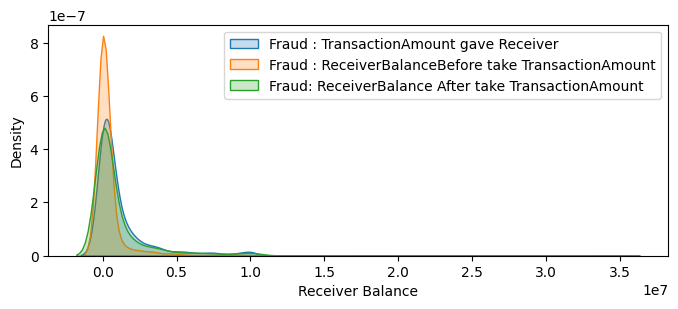

In [33]:
plt.figure(figsize=(8,3))
sns.kdeplot(df[df['IsFraud'] == 1]['TransactionAmount'], label="Fraud : TransactionAmount gave Receiver", fill=True)
sns.kdeplot(df[df['IsFraud'] == 1]['ReceiverBalanceBefore'], label="Fraud : ReceiverBalanceBefore take TransactionAmount", fill=True)
sns.kdeplot(df[df['IsFraud'] == 1]['ReceiverBalanceAfter'], label="Fraud: ReceiverBalance After take TransactionAmount", fill=True)
plt.xlabel("Receiver Balance")
plt.ylabel("Density")
plt.legend()
plt.show()

I observed that in fraudulent transactions, the ReceiverBalanceBefore distribution has a high peak at zero, meaning the scammer's account was mostly empty before the transaction. However, after the fraud occurred, the ReceiverBalanceAfter distribution closely matches the TransactionAmount, indicating that the scammer received almost the exact amount they stole, with only a slight difference. This insight clearly highlights fraudulent activity, as the scammer’s account was empty before the fraud and filled up immediately after.

Now, I will analyze the correlation to see if there are any strong relationships between different features. This will help in identifying important patterns and confirming insights about fraudulent transactions.

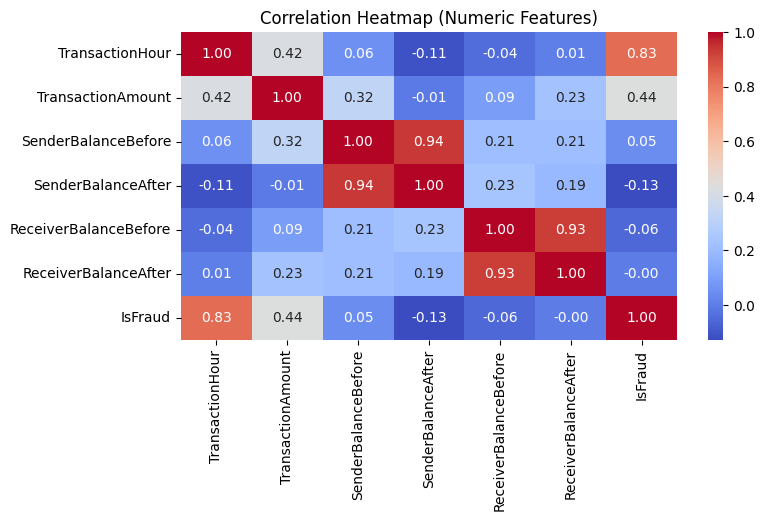

In [34]:
numeric_cols = df.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

Multicollinearity in independent variables is typically identified when the correlation between two or more features is above 0.75 or 0.8.

I have two sets of independent features: SenderBalanceBefore & SenderBalanceAfter (correlation: 0.94) and ReceiverBalanceBefore & ReceiverBalanceAfter (correlation: 0.93). Keeping both in each pair would cause multicollinearity, so one must be removed.

Since SenderBalanceBefore and ReceiverBalanceBefore are known before the transaction, they can be used for fraud prediction. However, after balances are only available post-transaction, making them unsuitable for predictive modeling. Therefore, we will retain SenderBalanceBefore and ReceiverBalanceBefore while dropping the after balances.







In [35]:
df2 = df.drop(columns=["ReceiverBalanceAfter" , "SenderBalanceAfter"])

In [36]:
df2.sample(5)

,TransactionHour,TransactionType,TransactionAmount,SenderBalanceBefore,ReceiverBalanceBefore,IsFraud
1874,1,PAYMENT,22043.92,0.00,0.0,0
2553,1,PAYMENT,2786.60,29009.51,0.0,0
488,42,TRANSFER,1566057.28,1566057.28,0.0,1
7174,6,PAYMENT,5972.35,0.00,0.0,0
7277,6,PAYMENT,1916.28,33036.00,0.0,0


I will start with undersampling, ensuring that no repeated rows are taken. The majority class data will be primarily used for validation to maintain balance. Right now, we are adjusting data levels changes to handle imbalance. If this does not yield good results, we will explore other techniques in backward elimination to manage class imbalance effectively.

Next, I will proceed with feature engineering. First, I will convert TransactionHour into predefined time ranges (low, medium) as mentioned earlier. Then, I will apply One-Hot Encoding (OHE) to TransactionType to handle categorical values. Finally, I will scale all numeric independent columns to ensure they are on the same scale, improving the model's performance.

In [37]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X = df2.drop(columns=['IsFraud'])
y = df2['IsFraud']
X_resampled, y_resampled = rus.fit_resample(X, y)

df_balanced = X_resampled.copy()
df_balanced['IsFraud'] = y_resampled

# Find the remaining validation data (extra majority class rows)
df_validation = df.loc[~df.index.isin(df_balanced.index)]

df2 = df_balanced.copy()

In [38]:
fraud_counts = df2["IsFraud"].value_counts()
fraud_percentages = (fraud_counts / fraud_counts.sum()) * 100
print(fraud_percentages)

IsFraud
0    50.0
1    50.0
Name: count, dtype: float64


In [39]:
df2.sample(5)

,TransactionHour,TransactionType,TransactionAmount,SenderBalanceBefore,ReceiverBalanceBefore,IsFraud
9218,7,TRANSFER,717318.86,0.00,8994590.18,0
1069,89,CASH_OUT,43928.31,43928.31,0.00,1
137,12,CASH_OUT,2007.00,2007.00,129917.80,1
6686,6,PAYMENT,1537.12,22494.00,0.00,0
9418,7,PAYMENT,4801.94,15169.00,0.00,0


In [40]:
fraud_counts_val = df_validation["IsFraud"].value_counts()
fraud_percentages_val = (fraud_counts_val / fraud_counts_val.sum()) * 100
print(fraud_percentages_val)

IsFraud
0    100.0
Name: count, dtype: float64


In [41]:
df_validation.sample(5)

,TransactionHour,TransactionType,TransactionAmount,SenderBalanceBefore,SenderBalanceAfter,ReceiverBalanceBefore,ReceiverBalanceAfter,IsFraud
1620,1,CASH_IN,193161.04,6372625.28,6565786.32,2441173.94,3940085.21,0
10943,7,PAYMENT,8654.44,66991.13,58336.69,0.00,0.00,0
9212,7,PAYMENT,4096.05,9751.00,5654.95,0.00,0.00,0
2799,1,PAYMENT,12762.36,15186.00,2423.64,0.00,0.00,0
2131,1,PAYMENT,6780.78,52640.00,45859.22,0.00,0.00,0


In [42]:
def categorize_transaction_hour(hour):
    if hour <= 8:
        return "Low"
    elif hour <= 50: 
        return "Medium"
    else:
        return "High"
df2["TransactionHour"] = df2["TransactionHour"].apply(categorize_transaction_hour)

In [43]:
df2.head()

,TransactionHour,TransactionType,TransactionAmount,SenderBalanceBefore,ReceiverBalanceBefore,IsFraud
7394,Low,PAYMENT,33410.82,379355.65,0.00,0
5826,Low,DEBIT,1141.74,240677.00,29379.28,0
2873,Low,PAYMENT,1146.72,10248.00,0.00,0
5884,Low,PAYMENT,1080.65,35125.00,0.00,0
5663,Low,CASH_IN,382513.35,4084533.87,501046.14,0


Since TransactionHour is ordered, I'll use label encoding to convert it into numeric form while preserving its sequence.

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2["TransactionHour"] = le.fit_transform(df2["TransactionHour"])

In [45]:
df2.sample(3)

,TransactionHour,TransactionType,TransactionAmount,SenderBalanceBefore,ReceiverBalanceBefore,IsFraud
868,0,TRANSFER,14385.54,14385.54,0.00,1
7827,1,PAYMENT,28710.56,0.00,0.00,0
113,2,CASH_OUT,93810.76,93810.76,4096048.05,1


TransactionType is not in order so i will do OHE

In [46]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop="first", dtype=int, sparse_output=False)
encoded = encoder.fit_transform(df2[["TransactionType"]])
df2 = df2.drop(columns=["TransactionType"])
df2[encoder.get_feature_names_out(["TransactionType"])] = encoded

In [47]:
df2.head(5)

,TransactionHour,TransactionAmount,SenderBalanceBefore,ReceiverBalanceBefore,IsFraud,TransactionType_CASH_OUT,TransactionType_DEBIT,TransactionType_PAYMENT,TransactionType_TRANSFER
7394,1,33410.82,379355.65,0.00,0,0,0,1,0
5826,1,1141.74,240677.00,29379.28,0,0,1,0,0
2873,1,1146.72,10248.00,0.00,0,0,0,1,0
5884,1,1080.65,35125.00,0.00,0,0,0,1,0
5663,1,382513.35,4084533.87,501046.14,0,0,0,0,0


In [48]:
df2.isnull().sum().sum()

0

TransactionAmount, SenderBalanceBefore, and SenderBalanceAfter should be scaled using StandardScaler because they have a wide range and  have outliers.








In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[['TransactionAmount', 'SenderBalanceBefore', 'ReceiverBalanceBefore']] = scaler.fit_transform(df2[['TransactionAmount', 'SenderBalanceBefore' ,'ReceiverBalanceBefore']])

In [50]:
df2.head(5)

,TransactionHour,TransactionAmount,SenderBalanceBefore,ReceiverBalanceBefore,IsFraud,TransactionType_CASH_OUT,TransactionType_DEBIT,TransactionType_PAYMENT,TransactionType_TRANSFER
7394,1,-0.395208,-0.305440,-0.305207,0,0,0,1,0
5826,1,-0.416116,-0.370287,-0.290575,0,0,1,0,0
2873,1,-0.416112,-0.478038,-0.305207,0,0,0,1,0
5884,1,-0.416155,-0.466405,-0.305207,0,0,0,1,0
5663,1,-0.169021,1.427136,-0.055663,0,0,0,0,0


Now,i will divide x independent features and y taget feature

In [51]:
X = df2.drop(columns=["IsFraud"])
y = df2["IsFraud"] 

Now, i will split our data into training and testing sets to evaluate the model's performance on unseen data.

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1827, 8), (457, 8), (1827,), (457,))

# Model Building

Our problem is a classification task, so we will start with Logistic Regression. We will analyze the confusion matrix to identify Type I and Type II errors and determine which mistake is more critical. Based on this, we will calculate precision and recall. If Logistic Regression does not give good results, we will try other algorithms to achieve the best performance.

In [53]:
y_train.value_counts()

IsFraud
1    915
0    912
Name: count, dtype: int64

In [54]:
y_test.value_counts()

IsFraud
0    230
1    227
Name: count, dtype: int64

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)

LogisticRegression()

In [56]:
train_preds = modelLR.predict(X_train)
accuracy = accuracy_score(y_train, train_preds)
print(accuracy)

0.8970990695128627


Type 2 Error (False Negative) is more critical because it means failing to detect a fraudulent transaction, allowing fraudsters to succeed, leading to financial losses and security risks. In contrast, Type 1 Error (False Positive) incorrectly flags a legitimate transaction as fraud, causing inconvenience but not direct harm. Since fraud prevention is the main goal, minimizing Type 2 Errors is crucial, even if it slightly increases Type 1 Errors. This is why recall is prioritized over precision, ensuring that most fraudulent transactions are detected rather than missed.








In [58]:
from sklearn.metrics import recall_score, f1_score, precision_score , confusion_matrix
test_preds = modelLR.predict(X_test)
accuracy = accuracy_score(y_test, test_preds)
cm = confusion_matrix(y_test, test_preds)
recall = recall_score(y_test, test_preds)
precision = precision_score(y_test, test_preds)
f1_score = f1_score(y_test, test_preds)
print("Recall Score:", recall)
print("f1_score:",f1_score)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("precision:",precision)

Recall Score: 0.986784140969163
f1_score: 0.9014084507042254
Accuracy: 0.8927789934354485
Confusion Matrix:
 [[184  46]
 [  3 224]]
precision: 0.8296296296296296


This data consists only of the majority class since we sampled from it earlier, keeping the rest for validation. Now, we'll use the model to predict on this data and analyze its mistakes. If the model correctly identifies non-fraud cases, it means it has learned to distinguish between fraud and non-fraud.

In [59]:
df_validation.head()

,TransactionHour,TransactionType,TransactionAmount,SenderBalanceBefore,SenderBalanceAfter,ReceiverBalanceBefore,ReceiverBalanceAfter,IsFraud
1143,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.0,0
1144,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.0,0
1146,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.0,0
1147,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.0,0
1148,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.0,0


this data have ReceiverBalanceAfter that i removed modeltrain data so it should have drop this too.

In [60]:
df_validation = df_validation.drop(columns=["ReceiverBalanceAfter" , "SenderBalanceAfter"])

In [61]:
df_validation.sample(5)

,TransactionHour,TransactionType,TransactionAmount,SenderBalanceBefore,ReceiverBalanceBefore,IsFraud
3306,1,CASH_IN,51311.41,8037193.29,269173.62,0
10986,7,PAYMENT,24070.53,11599.00,0.00,0
4196,2,CASH_OUT,97601.12,217640.98,99684.00,0
6534,5,PAYMENT,3287.08,28574.00,0.00,0
4498,2,CASH_OUT,170099.02,41945.71,608063.00,0


Before using the validation data, we need to preprocess and perform feature engineering to ensure consistency with the training data. This includes encoding categorical variables to match the format used during training so that the model can correctly interpret and process the data.

In [62]:
def preprocess_validation_data(df):
    # Categorizing TransactionHour
    def categorize_transaction_hour(hour):
        if hour <= 8:
            return "Low"
        elif hour <= 50: 
            return "Medium"
        else:
            return "High"

    df["TransactionHour"] = df["TransactionHour"].apply(categorize_transaction_hour)
    
    # Label Encoding TransactionHour
    le = LabelEncoder()
    df["TransactionHour"] = le.fit_transform(df["TransactionHour"])

    # One-Hot Encoding TransactionType
    encoder = OneHotEncoder(drop="first", dtype=int, sparse_output=False)
    encoded = encoder.fit_transform(df[["TransactionType"]])
    df = df.drop(columns=["TransactionType"])
    df[encoder.get_feature_names_out(["TransactionType"])] = encoded

    # Standard Scaling numeric columns
    scaler = StandardScaler()
    df[['TransactionAmount', 'SenderBalanceBefore','ReceiverBalanceBefore']] = scaler.fit_transform(
        df[['TransactionAmount', 'SenderBalanceBefore','ReceiverBalanceBefore']]
    )
    return df

In [63]:
df_validation = preprocess_validation_data(df_validation)

In [64]:
df2.head(1)

,TransactionHour,TransactionAmount,SenderBalanceBefore,ReceiverBalanceBefore,IsFraud,TransactionType_CASH_OUT,TransactionType_DEBIT,TransactionType_PAYMENT,TransactionType_TRANSFER
7394,1,-0.395208,-0.30544,-0.305207,0,0,0,1,0


In [65]:
df_validation.head(1)

,TransactionHour,TransactionAmount,SenderBalanceBefore,ReceiverBalanceBefore,IsFraud,TransactionType_CASH_OUT,TransactionType_DEBIT,TransactionType_PAYMENT,TransactionType_TRANSFER
1143,0,-0.43886,-0.408236,-0.351565,0,0,0,1,0


In [101]:
X_val = df_validation.drop(columns=['IsFraud'])  
y_val = df_validation['IsFraud']

# Predict on validation data
y_val_preds = modelLR.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_preds)
val_conf_matrix = confusion_matrix(y_val, y_val_preds)
val_recall = recall_score(y_val, y_val_preds)

print("Validation Accuracy:", val_accuracy)
print("Confusion Matrix:\n", val_conf_matrix)
print("Recall Score:", val_recall)

Validation Accuracy: 0.7766990291262136
Confusion Matrix:
 [[6880 1978]
 [   0    0]]
Recall Score: 0.0


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [67]:
df_validation["IsFraud"].value_counts()

IsFraud
0    8858
Name: count, dtype: int64

When I tested the validation data with the model, it became biased toward non-fraud transactions because the validation set contained only non-fraud transactions. Due to this bias, the model only focused on identifying non-fraud cases. However, the recall score came out to be 0, which means the model did not detect a single fraud case. This issue occurred because the validation set was made up entirely of non-fraud transactions, meaning there were no fraud cases for the model to test against. As a result, the model predicted everything correctly as non-fraud, making the Type 2 error (False Negatives) zero. 


# Backward elimination for Imbalanced dataset in Model-level changes.








After undersampling, very little data was left. When we used the remaining data for validation purposes, it became biased because it mostly contained data from the majority class. As a result, changing the data distribution didn’t help. Now, we will make changes at the model level.

Now, I will use the entire dataset but increase the weightage of the minority class to observe its impact first. This approach will help balance the influence of both classes without discarding any data.

In [68]:
data.head()  # whole data 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [69]:
data = data.rename(columns={
    "step": "TransactionHour",
    "type": "TransactionType",
    "amount": "TransactionAmount",
    "oldbalanceOrg": "SenderBalanceBefore",
    "newbalanceOrig": "SenderBalanceAfter",
    "oldbalanceDest": "ReceiverBalanceBefore",
    "newbalanceDest": "ReceiverBalanceAfter",
    "isFraud": "IsFraud"
})

In [70]:
data2 = data.drop(columns=["nameOrig","nameDest","ReceiverBalanceAfter" , "SenderBalanceAfter"])

In [71]:
data2.head(1)

,TransactionHour,TransactionType,TransactionAmount,SenderBalanceBefore,ReceiverBalanceBefore,IsFraud
0,1,TRANSFER,181.0,181.0,0.0,1


In [72]:
wholedata = preprocess_validation_data(data2)

In [73]:
wholedata.sample(1)

,TransactionHour,TransactionAmount,SenderBalanceBefore,ReceiverBalanceBefore,IsFraud,TransactionType_CASH_OUT,TransactionType_DEBIT,TransactionType_PAYMENT,TransactionType_TRANSFER
8972,1,-0.143104,0.898403,2.235358,0,0,0,0,0


In [74]:
X = wholedata.drop(columns=["IsFraud"])
y = wholedata["IsFraud"] 

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7799, 8), (3343, 8), (7799,), (3343,))

In [76]:
from sklearn.linear_model import LogisticRegression

class_weights = {0: 1, 1: 9}  # Approx 9x weight giving because of ratio 90:10 

LRmodel2 = LogisticRegression(class_weight=class_weights)
LRmodel2.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 9})

In [77]:
train_pred = LRmodel2.predict(X_train)
accuracy = accuracy_score(y_train, train_pred)
print(accuracy)

0.8254904474932684


In [78]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

test_pred = LRmodel2.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
cm = confusion_matrix(y_test, test_pred)
recall = recall_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)
print("Recall Score:", recall)
print("f1_score:",f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("precision:",precision)

Recall Score: 0.9855907780979827
f1_score: 0.5574572127139364
Accuracy: 0.8375710439724798
Confusion Matrix:
 [[2458  538]
 [   5  342]]
precision: 0.3886363636363636


now i check the performance in whole data 

In [79]:
predwhole = LRmodel2.predict(X)
accuracy = accuracy_score(y, predwhole)
print(accuracy)

0.8291150601328308


In [80]:
cm = confusion_matrix(y, predwhole)
recall = recall_score(y, predwhole)
precision = precision_score(y, predwhole)
print("confusion_matrix",cm)
print("recall",recall)
print("precision", precision)

confusion_matrix [[8116 1884]
 [  20 1122]]
recall 0.9824868651488616
precision 0.37325349301397204


In [81]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(LRmodel2, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.82948718 0.82948718 0.81602564 0.82371795 0.82488775]
Mean Accuracy: 0.8247


Model improvements are performing well and noticeable have been observed in Model level changes








Now, we will use different algorithms to achieve better accuracy and minimize errors on the train, test, and whole dataset.








In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 120,130],  
    'max_depth': [3 ,4, 5],       
    'min_samples_split': [8 , 9 ,10],  
    'min_samples_leaf': [4, 5, 6 , 8],  
    'class_weight': [{0: 1, 1: 7}, {0: 1, 1: 8}, {0: 1, 1: 9}]  # Different class weight options
}

RF_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(RF_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'class_weight': {0: 1, 1: 7}, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [86]:
RF_best_model = RandomForestClassifier(
    class_weight={0: 1, 1: 7}, 
    max_depth=5, 
    min_samples_leaf=4, 
    min_samples_split=10, 
    n_estimators=100, 
    random_state=42
)

RF_best_model.fit(X_train, y_train)

train_preds = RF_best_model.predict(X_train)

train_accuracy = accuracy_score(y_train, train_preds)
print(f"Train Accuracy: {train_accuracy:.4f}")

Train Accuracy: 0.9901


In [87]:
test_pred = RF_best_model.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
cm = confusion_matrix(y_test, test_pred)
recall = recall_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)
print("Recall Score:", recall)
print("f1_score:",f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("precision:",precision)

Recall Score: 0.9769452449567724
f1_score: 0.9509116409537167
Accuracy: 0.989530361950344
Confusion Matrix:
 [[2969   27]
 [   8  339]]
precision: 0.9262295081967213


In [88]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(RF_best_model, X_train, y_train, cv=8, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.99076923 0.99282051 0.98871795 0.98564103 0.99179487 0.98666667
 0.99282051 0.98870637]
Mean Accuracy: 0.9897


In [89]:
feature_importance = RF_best_model.feature_importances_
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

feature_df 

,Feature,Importance
0,TransactionHour,0.334880
1,TransactionAmount,0.169486
2,SenderBalanceBefore,0.106184
3,ReceiverBalanceBefore,0.084822
4,TransactionType_CASH_OUT,0.087189
5,TransactionType_DEBIT,0.004479
6,TransactionType_PAYMENT,0.116170
7,TransactionType_TRANSFER,0.096789


In [90]:
predwhole = RF_best_model.predict(X)
accuracy = accuracy_score(y, predwhole)
print(accuracy)

0.989947944713696


In [91]:
cm = confusion_matrix(y, predwhole)
recall = recall_score(y, predwhole)
precision = precision_score(y, predwhole)
print("confusion_matrix",cm)
print("recall",recall)
print("precision", precision)

confusion_matrix [[9909   91]
 [  21 1121]]
recall 0.9816112084063048
precision 0.9249174917491749


We applied Random Forest with the best parameters, reduced errors, and improved accuracy. Then, we used it to predict the entire dataset, achieving better results than Logistic Regression. Now, we will try to further reduce its error using Gradient Boosting.

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

class_weights = {0: 1, 1: 7}

sample_weights = np.where(y_train == 1, class_weights[1], class_weights[0])

GB_best_model = GradientBoostingClassifier(
    n_estimators=100, 
    max_depth=3, 
    min_samples_leaf=4, 
    min_samples_split=8, 
    random_state=42
)

GB_best_model.fit(X_train, y_train, sample_weight=sample_weights)

train_preds = GB_best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)

print(f"Train Accuracy: {train_accuracy:.4f}")

Train Accuracy: 0.9959


In [93]:
test_pred = GB_best_model.predict(X_test)
accuracy = accuracy_score(y_test, test_pred)
cm = confusion_matrix(y_test, test_pred)
recall = recall_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)
print("Recall Score:", recall)
print("f1_score:",f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("precision:",precision)

Recall Score: 0.9827089337175793
f1_score: 0.9673758865248226
Accuracy: 0.9931199521387974
Confusion Matrix:
 [[2979   17]
 [   6  341]]
precision: 0.952513966480447


In [94]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(GB_best_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.99615385 0.99551282 0.99038462 0.99487179 0.99679282]
Mean Accuracy: 0.9947


In [95]:
feature_importance = GB_best_model.feature_importances_
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
feature_df

,Feature,Importance
0,TransactionHour,0.644439
6,TransactionType_PAYMENT,0.154409
3,ReceiverBalanceBefore,0.104553
4,TransactionType_CASH_OUT,0.068751
2,SenderBalanceBefore,0.010720
7,TransactionType_TRANSFER,0.007935
1,TransactionAmount,0.007818
5,TransactionType_DEBIT,0.001376


I applied Gradient Boosting and observed that it further reduced the errors of Random Forest. After cross-validation, the model remained consistent across different folds, as the mean accuracy (0.9968) is high and the variance is low.

In [96]:
predwhole = GB_best_model.predict(X)
accuracy = accuracy_score(y, predwhole)
cm = confusion_matrix(y, predwhole)
recall = recall_score(y, predwhole)
precision = precision_score(y, predwhole)
print("confusion_matrix",cm)
print("recall",recall)
print("precision", precision)
print("accuracy",accuracy)

confusion_matrix [[9953   47]
 [   8 1134]]
recall 0.9929947460595446
precision 0.9602032176121931
accuracy 0.9950637228504757


The GB_best_model has a lower error rate across the entire dataset compared to other models. This makes it my best-performing model so far, and therefore, I accept it for solving my business problem.







# Import the Gradient Boost model into the file for making predictions.

In [97]:
import pickle
with open("GB_best_model.pkl", "wb") as model_file:
    pickle.dump(GB_best_model, model_file)

In [98]:
with open("GB_best_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

In [99]:
predwhole = loaded_model.predict(X)
accuracy = accuracy_score(y, predwhole)
cm = confusion_matrix(y, predwhole)
recall = recall_score(y, predwhole)
precision = precision_score(y, predwhole)
print("confusion_matrix",cm)
print("recall",recall)
print("precision", precision)
print("accuracy",accuracy)

confusion_matrix [[9953   47]
 [   8 1134]]
recall 0.9929947460595446
precision 0.9602032176121931
accuracy 0.9950637228504757


In [100]:
y_pred = loaded_model.predict(X_test) 
print(y_pred) 

[0 1 0 ... 0 0 0]
